[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/tutorial/notebooks/timepix3_from_event_to_hito_hdf5)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [13]:
from __code import system
from __code.timepix3_from_event_to_histo_hdf5.timepix3_from_event_to_histo_hdf5 import Timepix3FromEventToHistoHdf5

import h5py
import numpy as np

system.System.select_working_dir(facility='SNS', instrument='SNAP')
from __code.__all import custom_style
custom_style.style()

import matplotlib.pyplot as plt
%matplotlib notebook

** Using Debugging Mode! **


# Select Event NeXus

In [24]:
o_event = Timepix3FromEventToHistoHdf5(working_dir=system.System.get_working_dir())
o_event.select_event_nexus()

 events
    │
    ├── NHits (439546,)
    ├── tof_ns (439546,)
    ├── x (439546,)
    └── y (439546,)


# Manually loading the data

In [25]:
with h5py.File(o_event.input_nexus_file_name, 'r') as nxs:
    o_event.x_array = np.array(nxs['events']['x'])
    o_event.y_array = np.array(nxs['events']['y'])
    o_event.tof_array = np.array(nxs['events']['tof_ns'])

# Some statistics 

In [26]:
o_event.display_infos()

# Define MCP detector size 

In [27]:
o_event.define_detector()

# Binning data (Zzz)

In [28]:
o_event.select_binning_parameter()

IntText(value=1000, description='Nbr of bins:')

IntSlider(value=50, description='% to use', min=1)

This may take some time, be patient!

In [29]:
o_event.bins()

# Display integrated stack 

<IPython.core.display.Javascript object>


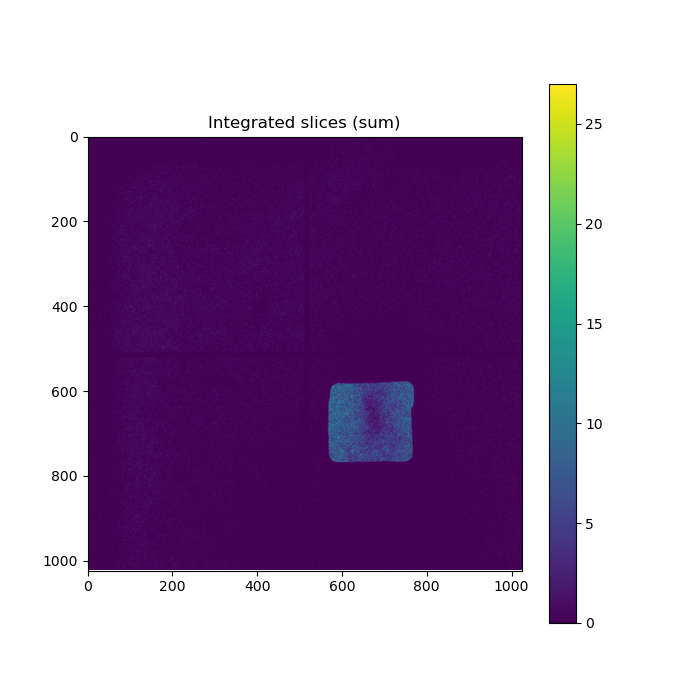

interactive(children=(IntSlider(value=0, description='vmin', max=27), IntSlider(value=27, description='vmax', …

In [30]:
o_event.display_integrated_stack()

# Display slices 

<IPython.core.display.Javascript object>


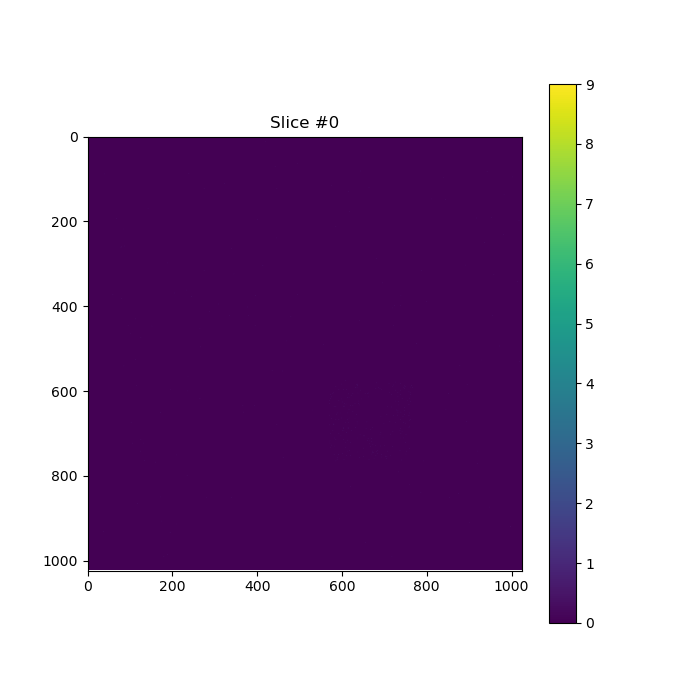

(1000, 1024, 1024)


interactive(children=(IntSlider(value=0, description='index', max=999), Output()), _dom_classes=('widget-inter…

In [31]:
o_event.display_slices()

# Export Histogram HDF5 

In [32]:
o_event.define_output_filename()

In [33]:
o_event.select_output_location()